# Khám phá dữ liệu MNIST và thử nghiệm mô hình


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

# Tải dữ liệu MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print('Train:', x_train.shape, y_train.shape)
print('Test:', x_test.shape, y_test.shape)

Train: (60000, 28, 28) (60000,)
Test: (10000, 28, 28) (10000,)


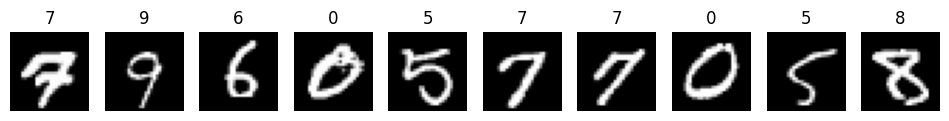

In [2]:
# Hiển thị 10 ảnh ngẫu nhiên từ tập train
plt.figure(figsize=(12,2))
for i in range(10):
    idx = np.random.randint(0, len(x_train))
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[idx], cmap='gray')
    plt.title(y_train[idx])
    plt.axis('off')
plt.show()

# Train mô hình với CNN

Khám phá dữ liệu và thử nghiệm mô hình.

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def main():
    # Cấu hình GPU
    gpus = tf.config.list_physical_devices('GPU')
    if gpus:
        try:
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
            print("✅ GPU đã được cấu hình thành công.")
        except RuntimeError as e:
            print("⚠️ Lỗi khi cấu hình GPU:", e)
    else:
        print("❌ Không tìm thấy GPU.")
    # Thư mục lưu model và ảnh biểu đồ
    output_dir = "outputs"
    os.makedirs(output_dir, exist_ok=True)
    
    # Tải dataset MNIST
    (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
    
    # Chuẩn hóa dữ liệu (0-1) và reshape cho CNN
    x_train = x_train.astype("float32") / 255.0
    x_test = x_test.astype("float32") / 255.0
    x_train = np.expand_dims(x_train, axis=-1)  # (60000, 28, 28, 1)
    x_test = np.expand_dims(x_test, axis=-1)
    
    # Data augmentation
    datagen = keras.preprocessing.image.ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1
    )
    datagen.fit(x_train)
    
    # Xây dựng mô hình CNN
    model = keras.Sequential([
        layers.Conv2D(64, (3, 3), activation="relu", padding="same", input_shape=(28, 28, 1)),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
    
        layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
    
        layers.Conv2D(256, (3, 3), activation="relu", padding="same"),
        layers.BatchNormalization(),
        layers.Conv2D(256, (3, 3), activation="relu", padding="same"),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
    
        layers.Flatten(),
        layers.Dense(512, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(10, activation="softmax"),
    ])
    
    # Biên dịch mô hình
    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    
    # Callback dừng sớm
    early_stopping = keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=5,
        restore_best_weights=True
    )
    
    # Huấn luyện với data augmentation
    history = model.fit(
        datagen.flow(x_train, y_train, batch_size=64),
        epochs=30,
        validation_data=(x_test, y_test),
        callbacks=[early_stopping]
    )
    
    # Đánh giá trên tập kiểm tra
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    print(f"🎯 Độ chính xác trên tập kiểm tra: {test_acc:.4f}")
    
    # Lưu mô hình
    model_path = os.path.join(output_dir, "mnist_cnn.h5")
    model.save(model_path)
    print(f"✅ Mô hình đã được lưu tại: {model_path}")
    
    # Vẽ và lưu biểu đồ accuracy & loss
    plt.figure(figsize=(12, 4))
    
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='train acc')
    plt.plot(history.history['val_accuracy'], label='val acc')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    
    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='val loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    chart_path = os.path.join(output_dir, "accuracy_loss.png")
    plt.savefig(chart_path, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"✅ Biểu đồ đã được lưu tại: {chart_path}")
    
    # Thông tin về training
    epochs_trained = len(history.history['accuracy'])
    max_val_acc = max(history.history['val_accuracy'])
    max_epoch = history.history['val_accuracy'].index(max_val_acc) + 1
    print(f"Số epoch đã huấn luyện: {epochs_trained}")
    print(f"Độ chính xác cao nhất trên validation: {max_val_acc:.4f} (epoch {max_epoch})")

if __name__ == "__main__":
    main()


❌ Không tìm thấy GPU.


c:\Program Files\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30


c:\Program Files\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


KeyboardInterrupt: 

In [1]:
import torch

if torch.cuda.is_available():
    print("✅ Đã nhận GPU:", torch.cuda.get_device_name(0))
else:
    print("❌ Không tìm thấy GPU")

OSError: [WinError 126] The specified module could not be found. Error loading "c:\Program Files\Python310\lib\site-packages\torch\lib\caffe2_nvrtc.dll" or one of its dependencies.

In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.19.0
GPU available: []


In [4]:
import tensorflow as tf
print(tf.sysconfig.get_build_info())


OrderedDict([('is_cuda_build', False), ('is_rocm_build', False), ('is_tensorrt_build', False), ('msvcp_dll_names', 'msvcp140.dll,msvcp140_1.dll')])


In [2]:
import torch

if torch.cuda.is_available():
    print("✅ Đã nhận GPU:", torch.cuda.get_device_name(0))
else:
    print("❌ Không tìm thấy GPU")


✅ Đã nhận GPU: NVIDIA GeForce RTX 3060 Laptop GPU
